In [2]:
%conda install matplotlib -y

import matplotlib.pyplot as plt
import numpy as np

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
- DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
| DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-64/current_repodata.json HTTP/1.1" 304 0
- DEBUG:urllib3.util.retry:Incremented Retry for (url='/pkgs/r/osx-64/current_repodata.json'): Retry(total=2, connect=None, read=None, redirect=None, status=None)
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (2): repo.anaconda.com:443
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-64/current_repodata.json HTTP/1.1" 304 0
done
Solvin

# 7회차 과제
목표: 정규성 검정 및 T 검정 수행하기.  
(수업 자료의 `과제 연계 실습` 참고)

## 선택형 문제

1. P-value란 귀무 가설을 참으로 가정하고 표본의 결과가 실제로 나타날 확률을 계산한 것이다.

2. P-value가 낮다는 것은 귀무 가설이 참일 때 지금과 같은 결과가 관측될 확률이 낮다는 것을 의미한다.

3. P-value가 높으면 귀무 가설은 채택히고 대립 가설은 기각한다.

## 정규성 검정

주어진 분포가 정규 분포를 따르는 모집단으로부터 추출되었는지 올바른 분석법을 사용해 검정하시오.

In [35]:
#귀무 가설 (H0): 데이터가 정규 분포를 따른다.
#대립 가설 (H1): 데이터가 정규 분포를 따르지 않는다.

In [33]:
from scipy import stats
q1 = stats.cauchy().rvs(8000)

test_stat, pv = stats.kstest(q1, 'norm', args=(q1.mean(), q1.var() ** 0.5))
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 0.3551686132879055, p-value: 0.0


In [44]:
#데이터가 정규 분포를 따르지 않는다.

## T 검정

주어진 상황에 맞는 적절한 t 검정을 수행하시오.

### 상황 1. 실험군과 대조군

신약의 효과를 확인하기 위해 희귀한 뇌 질환, '웨스트 증후군'을 겪고 있는 100명의 환자를 모집하였다.  
연구자는 그 중 50 명에게는 진짜 약을 투여하고 나머지 50 명에게는 위약을 투여한 뒤 차도를 지켜보았다.  
주어진 데이터가 각 집단에서 5명의 표본을 추출한 결과라고 할 때, 정말로 이 신약이 효과가 있는지 통계적 방법으로 검정하시오.

In [36]:
#귀무 가설 (H0): 두 집단의 효과가 비슷하다.
#대립 가설 (H1): 두 집단의 효과가 다르다.

진짜 약 차도 표본 평균: 0.548834046054764
위약 차도 표본 평균: 0.22639857245528788


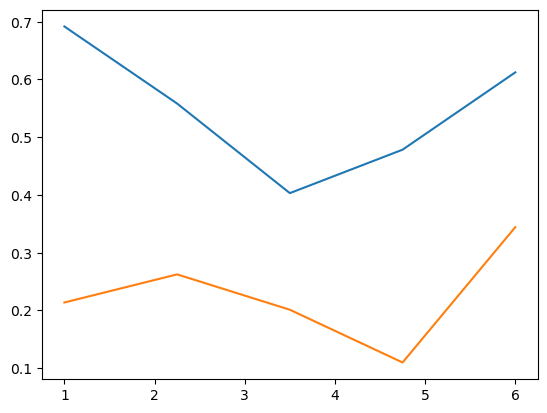

In [37]:
x = np.linspace(1, 6, 5)
real = stats.uniform(0.4, 0.3).rvs(size=5)
placebo = stats.uniform(0.1, 0.3).rvs(size=5)

plt.plot(x, real)
plt.plot(x, placebo)
print(f"진짜 약 차도 표본 평균: {real.mean()}")
print(f"위약 차도 표본 평균: {placebo.mean()}")

In [38]:
test_stat, pv = stats.ttest_rel(real, placebo)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 6.835260723388567, p-value: 0.0023964538465224227


In [39]:
#이 신약이 효과가 있다고 할 근거가 충분하다.

### 상황 2. 중간고사 난이도

서로 인접한 두 고등학교의 중간고사 난이도가 유사한지 판단하기 위해, 각 학교에서 10명씩을 골라 이번 수학시험 점수를 물어보았다.  
이를 이용해 두 학교의 중간고사 난이도가 비슷했는지 통계적 방법으로 검정하시오.

In [41]:
#귀무 가설 (H0): 두 학교의 중간고사 평균이 서로 같다.
#대립 가설 (H1): 두 학교의 중간고사 평균이 서로 다르다.

A 학교 표본 평균: 65.00445081984944
B 학교 표본 평균: 68.17571932484334


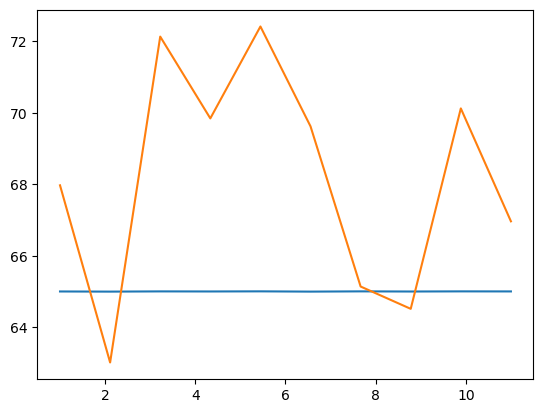

In [42]:
x = np.linspace(1, 11, 10)
school_A = stats.uniform(65, 0.01).rvs(size=10)
school_B = stats.uniform(63, 10).rvs(size=10)

plt.plot(x, school_A)
plt.plot(x, school_B)
print(f"A 학교 표본 평균: {school_A.mean()}")
print(f"B 학교 표본 평균: {school_B.mean()}")

In [43]:
test_stat, pv = stats.ttest_ind(school_A, school_B)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: -3.119810718968638, p-value: 0.0059171273664318505


In [28]:
#두 학교의 중간고사 난이도가 비슷하지 않았다고 할 근거가 충분하다.